In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Load Dataset
df = pd.read_csv("hotel_bookings.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


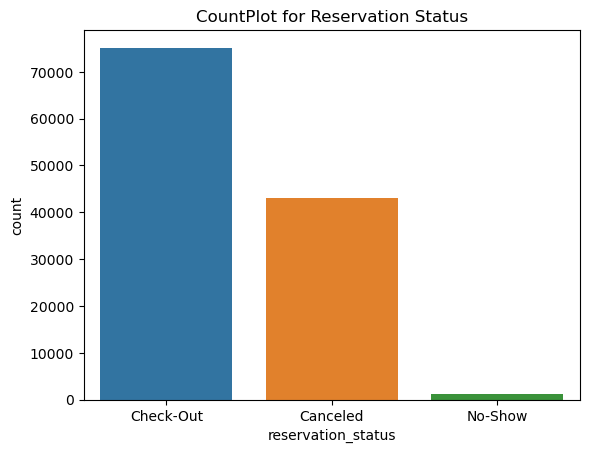

In [5]:
target = 'reservation_status'
sns.countplot(x='reservation_status', data=df)
plt.title('CountPlot for Reservation Status');

In [6]:
def wrangle(df):
    df = df.copy()
    # Drop unnecessary columns, or columns that seem to have little impact on target
    df = df.drop(['company', 'agent', 'arrival_date_week_number'], axis=1)
    df = df.dropna(axis=0)  
    
    # Set date column to index
    # Doesn't add any substantial info, and has high cardinality. 
    df.set_index(pd.to_datetime(df['reservation_status_date']), inplace=True)
    df = df.drop(['reservation_status_date'], axis=1)
    
    # Replace 'No-Show' with 'Canceled' in reservation_status
    df['reservation_status'] = df['reservation_status'].replace({'No-Show': 'Canceled'})
    
    # Define features
    features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'previous_cancellations',
                'booking_changes', 'adr', 'required_car_parking_spaces', 'country', 'deposit_type']
    
    # Ensure target variable is included
    target = 'reservation_status'
    
    # Return the DataFrame and features including target variable
    return df, features, target
df, features, target = wrangle(df)

In [8]:
X = df[features]
y = df[target]
# Combine features and target into a new DataFrame
dataset = pd.concat([X, y], axis=1)

In [9]:
dataset.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,previous_cancellations,booking_changes,adr,required_car_parking_spaces,country,deposit_type,reservation_status
reservation_status_date,,,,,,,,,,
2015-07-01,342,0,0,0,3,0.0,0,PRT,No Deposit,Check-Out
2015-07-01,737,0,0,0,4,0.0,0,PRT,No Deposit,Check-Out
2015-07-02,7,0,1,0,0,75.0,0,GBR,No Deposit,Check-Out
2015-07-02,13,0,1,0,0,75.0,0,GBR,No Deposit,Check-Out
2015-07-03,14,0,2,0,0,98.0,0,GBR,No Deposit,Check-Out


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118898 entries, 2015-07-01 to 2017-09-07
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   lead_time                    118898 non-null  int64  
 1   stays_in_weekend_nights      118898 non-null  int64  
 2   stays_in_week_nights         118898 non-null  int64  
 3   previous_cancellations       118898 non-null  int64  
 4   booking_changes              118898 non-null  int64  
 5   adr                          118898 non-null  float64
 6   required_car_parking_spaces  118898 non-null  int64  
 7   country                      118898 non-null  object 
 8   deposit_type                 118898 non-null  object 
 9   reservation_status           118898 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 10.0+ MB


In [13]:
#summarizing stats of the data
dataset.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,previous_cancellations,booking_changes,adr,required_car_parking_spaces
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,104.311435,0.928897,2.502145,0.087142,0.221181,102.003243,0.061885
std,106.903309,0.996216,1.900168,0.845869,0.652785,50.485862,0.244172
min,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000
25%,18.000000,0.000000,1.000000,0.000000,0.000000,70.000000,0.000000
50%,69.000000,1.000000,2.000000,0.000000,0.000000,95.000000,0.000000
75%,161.000000,2.000000,3.000000,0.000000,0.000000,126.000000,0.000000
max,737.000000,16.000000,41.000000,26.000000,21.000000,5400.000000,8.000000


In [16]:
#get train, validate,and test subsets
train = df[df['arrival_date_year']==2015].copy()
val = df[df['arrival_date_year']==2016].copy()
test = df[df['arrival_date_year'] == 2017].copy()
train.shape, val.shape, test.shape

((21859, 28), (56435, 28), (40604, 28))

In [17]:
#seperating X matrices and correspind y vectors
target = 'reservation_status'
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]
X_val= val[features]
y_val = val[target]
X_train.shape,y_train.shape,X_val.shape, y_val.shape, X_test.shape, y_test.shape

((21859, 9), (21859,), (56435, 9), (56435,), (40604, 9), (40604,))

In [18]:
#baselines
#Training Baseline
y_train.value_counts(normalize=True)

reservation_status
Check-Out    0.629169
Canceled     0.370831
Name: proportion, dtype: float64

In [19]:
#Validation Baseline
y_val.value_counts(normalize=True)

reservation_status
Check-Out    0.640064
Canceled     0.359936
Name: proportion, dtype: float64

In [20]:
#instantitate classes

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import category_encoders as ce
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# Model0

In [28]:
#Build pipeline using RadnomSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
model0 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_jobs = -1, random_state=40)

)

param_distributions = { 
    'randomforestclassifier__n_estimators': [100],
    'randomforestclassifier__criterion': ['gini', 'entropy'],
    'randomforestclassifier__max_features': [5,10,20],
    'randomforestclassifier__min_samples_split': [5,10,15,20],
    'randomforestclassifier__min_samples_leaf': [2]
}
search = RandomizedSearchCV(
    model0, 
    param_distributions = param_distributions,
    n_iter = 10,
    cv=10,
    scoring ='accuracy',
    verbose = 1,
    return_train_score = True,
    n_jobs = -1
)

search.fit(X_train, y_train)
print('Cross-validation Best Score', search.best_score_)
print('Best Estimator:' ,search.best_params_)
print('Best Model', search.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Cross-validation Best Score 0.8406191470162737
Best Estimator: {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__min_samples_split': 20, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_features': 5, 'randomforestclassifier__criterion': 'entropy'}
Best Model Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['country', 'deposit_type'],
                                mapping=[{'col': 'country',
                                          'data_type': dtype('O'),
                                          'mapping': PRT     1
GBR     2
USA     3
ESP     4
IRL     5
       ..
GEO    95
TMP    96
MUS    97
ECU    98
NaN    -2
Length: 99, dtype: int64},
                                         {'col': 'deposit_type',
                                          'data_type': dtype('O'),
                                          'mapping': No Deposit    1
Refundable 

In [29]:
model0 = search.best_estimator_
model0

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['country', 'deposit_type'],
                                mapping=[{'col': 'country',
                                          'data_type': dtype('O'),
                                          'mapping': PRT     1
GBR     2
USA     3
ESP     4
IRL     5
       ..
GEO    95
TMP    96
MUS    97
ECU    98
NaN    -2
Length: 99, dtype: int64},
                                         {'col': 'deposit_type',
                                          'data_type': dtype('O'),
                                          'mapping': No Deposit    1
Refundable    2
Non Refund    3
NaN          -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_features=5,
                                        min_samples_leaf=2,
                                        min_samples_split=20, n_jobs=-1,
                                        random_state=40))])

In [30]:
y_pred0 = model0.predict(X_val)
y_pred_probab0 = model0.predict_proba(X_val)

In [31]:
print('Random Forest Classifier Classification Report')
print(classification_report(y_val, y_pred0))

Random Forest Classifier Classification Report
              precision    recall  f1-score   support

    Canceled       0.85      0.45      0.59     20313
   Check-Out       0.76      0.96      0.84     36122

    accuracy                           0.77     56435
   macro avg       0.80      0.70      0.72     56435
weighted avg       0.79      0.77      0.75     56435



In [32]:
roc_auc_score(y_val,y_pred_probab0[:,1])

0.7550305719749255

In [33]:
accuracy_score(y_val,y_pred0)

0.7737928590413751

# Model1 - Logistic Regression 

In [57]:
#Improved logistic regression model by hyperparameter tunning
#Max iterations
model1 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    LogisticRegression(random_state=40, max_iter = 200)
)
model1.fit(X_train, y_train)



C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['country', 'deposit_type'],
                                mapping=[{'col': 'country',
                                          'data_type': dtype('O'),
                                          'mapping': PRT     1
GBR     2
USA     3
ESP     4
IRL     5
       ..
GEO    95
TMP    96
MUS    97
ECU    98
NaN    -2
Length: 99, dtype: int64},
                                         {'col': 'deposit_type',
                                          'data_type': dtype('O'),
                                          'mapping': No Deposit    1
Refundable    2
Non Refund    3
NaN          -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('logisticregression',
                 LogisticRegression(max_iter=200, random_state=40))])

In [68]:
# Define the pipeline
model2 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    LogisticRegression(random_state=40, max_iter=200)
)

# Fit the model
model2.fit(X_train, y_train)

# Predict probabilities
probs2 = model2.predict_proba(X_val)
preds2 = probs2[:, 1]

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC for Decision Tree: 0.7446854578948366
AUC for RandomForest: 0.7550305930993964
AUC for Logistic Regression: 0.7446854578948366


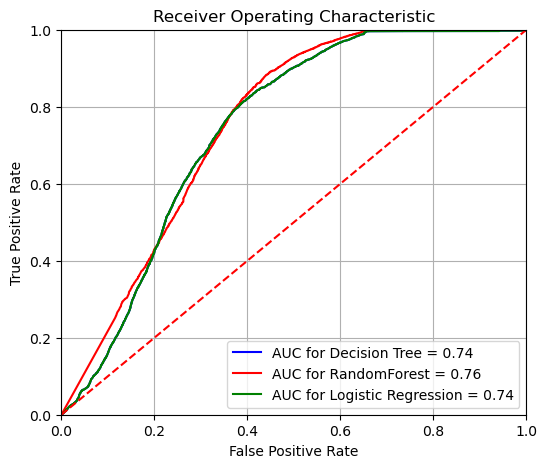

In [72]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# Calculate ROC for Decision Tree
probs2 = model2.predict_proba(X_val)
preds2 = probs2[:, 1]
fpr2, tpr2, _ = metrics.roc_curve(y_val, preds2, pos_label='Check-Out')
roc_auc2 = metrics.auc(fpr2, tpr2)

# Calculate ROC for XGBoost
probs1 = model1.predict_proba(X_val)
preds1 = probs1[:, 1]
fpr1, tpr1, _ = metrics.roc_curve(y_val, preds1, pos_label='Check-Out')
roc_auc1 = metrics.auc(fpr1, tpr1)

# Calculate ROC for RandomForest
probs0 = model0.predict_proba(X_val)
preds0 = probs0[:, 1]
fpr0, tpr0, _ = metrics.roc_curve(y_val, preds0, pos_label='Check-Out')
roc_auc0 = metrics.auc(fpr0, tpr0)

# Print AUC scores
print('AUC for Decision Tree:', roc_auc2)
print('AUC for RandomForest:', roc_auc0)
print('AUC for Logistic Regression:', roc_auc1)

# Plot ROC Curves
plt.figure(figsize=(6, 5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr2, tpr2, 'b', label='AUC for Decision Tree = %0.2f' % roc_auc2)
plt.plot(fpr0, tpr0, 'r', label='AUC for RandomForest = %0.2f' % roc_auc0)
plt.plot(fpr1, tpr1, 'g', label='AUC for Logistic Regression = %0.2f' % roc_auc1)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.show()


# Test Results

In [60]:
y_pred4 = model1.predict(X_test)
print('Classification Report for Logistic Regression Model on Test Set Data')
print(classification_report(y_test,y_pred4))

Classification Report for Logistic Regression Model on Test Set Data
              precision    recall  f1-score   support

    Canceled       0.94      0.27      0.42     15734
   Check-Out       0.68      0.99      0.81     24870

    accuracy                           0.71     40604
   macro avg       0.81      0.63      0.62     40604
weighted avg       0.78      0.71      0.66     40604



In [61]:
y_pred5 = model0.predict(X_test)
print('Random Forest Classifier Classification Report on Test Set Data')
print(classification_report(y_test, y_pred5))

Random Forest Classifier Classification Report on Test Set Data
              precision    recall  f1-score   support

    Canceled       0.88      0.34      0.49     15734
   Check-Out       0.70      0.97      0.81     24870

    accuracy                           0.73     40604
   macro avg       0.79      0.66      0.65     40604
weighted avg       0.77      0.73      0.69     40604



In [73]:
y_pred3 = model2.predict(X_test_encoded)
print('Classification report for Decision Tree on Test Set Data')
print(classification_report(y_test, y_pred3))

Classification report for Decision Tree on Test Set Data
              precision    recall  f1-score   support

    Canceled       0.16      0.00      0.00     15734
   Check-Out       0.61      1.00      0.76     24870

    accuracy                           0.61     40604
   macro avg       0.39      0.50      0.38     40604
weighted avg       0.44      0.61      0.47     40604



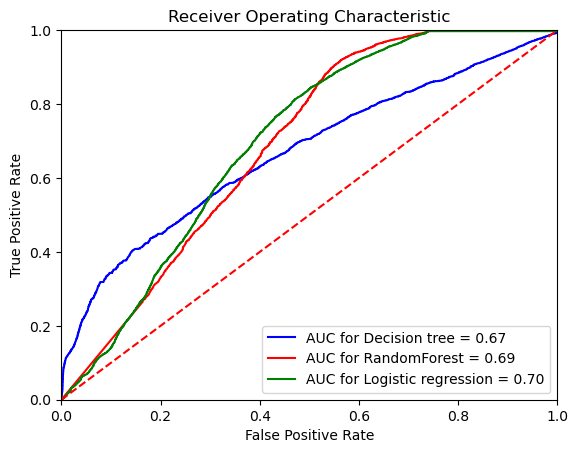

In [75]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification models
# This aucroc curve will use the test set

probs2 = model1.predict_proba(X_test)
preds2 = probs2[:,1]
fpr2,tpr2, threshold = metrics.roc_curve(y_test,preds2, pos_label='Check-Out')
roc_auc2 = metrics.auc(fpr2,tpr2)

probs1 = model2.predict_proba(X_test_encoded)
preds1 = probs1[:,1]
fpr1, tpr1, threshold = metrics.roc_curve(y_test, preds1, pos_label='Check-Out')
roc_auc1 = metrics.auc(fpr1, tpr1)

probs0 = model0.predict_proba(X_test)
preds0 = probs0[:,1]
fpr0, tpr0, threshold = metrics.roc_curve(y_test, preds0, pos_label ='Check-Out')
roc_auc0 = metrics.auc(fpr0, tpr0)



# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC for Decision tree = %0.2f' % roc_auc1)
plt.plot(fpr0, tpr0, 'r', label = 'AUC for RandomForest = %0.2f' % roc_auc0)
plt.plot(fpr2, tpr2, 'g', label = 'AUC for Logistic regression = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [83]:
def predict(lead_time,stays_in_weekend_nights,stays_in_week_nights,
               previous_cancellations,booking_changes,adr,required_car_parking_spaces,country,deposit_type):
    df = pd.DataFrame(
        columns= ['lead_time','stays_in_weekend_nights','stays_in_week_nights',
                  'previous_cancellations','booking_changes','adr','required_car_parking_spaces',
                  'country','deposit_type']
            
            ,
        data=[[lead_time,stays_in_weekend_nights,stays_in_week_nights,
               previous_cancellations,booking_changes,adr,required_car_parking_spaces,country,deposit_type]]
    )
    y_pred_probab0 = round(model0.predict_proba(df)[0][0],2)
    y_pred = model1.predict(df)[0]
    print(f' Probabillity that person checked-out {y_pred_probab0}%')
    return f'Person {y_pred} Booking.'

In [84]:
#Testing predict function
predict(7,20,20,0,2,10,0,'USA','Non Refund')

 Probabillity that person checked-out 0.51%


'Person Canceled Booking.'

# Pickling The Model File For Deployent

In [78]:
import pickle

In [81]:
with open('logmodel.pkl', 'wb') as file:
    pickle.dump(model1, file)

In [82]:
pickled_model=pickle.load(open('logmodel.pkl', 'rb'))